<a href="https://colab.research.google.com/github/iRoseM/Freelancing-Trends--IT362/blob/main/IT362_groub_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Freelancing Trends and Sustainability**

## **1. Introduction:**
Freelancing has become a popular career path due to its flexibility and the opportunities it provides across various fields. However, several questions arise regarding its sustainability, income stability, and the demographics of those engaging in this type of work. Understanding freelancing trends can help clarify whether freelancing is a sustainable career choice, identify income patterns, and determine the demographics of freelancers, such as  examining whether freelancing is a sustainable career path, identifying countries with the highest concentration of skilled freelancers and more.


## **1.	Data Sources:**


**Primary dataset** is sourced through using web scraping method on [freelancer.com](https://www.freelancer.com) website. Web scraping is a technique for extracting unstructured data from websites, enabling efficient large-scale data collection.

The main tool used for scraping is BeautifulSoup.

### - Printing HTML structure to easily navigate the code

In [54]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import random
from IPython.core.display import display, HTML
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



# Collect and parse first page
response = requests.get('https://www.freelancer.com/freelancers/1')
print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')
print (soup.prettify())



200
<!DOCTYPE html>
<html class="is-responsive is-mobile-first" lang="en">
 <head>
  <!-- Critical path meta tags only -->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="en" http-equiv="Content-Language"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <title>
    Freelancers For Hire | Freelancer
   </title>
   <link crossorigin="" href="//www.f-cdn.com" rel="preconnect"/>
   <link href="//cdn2.f-cdn.com" rel="dns-prefetch"/>
   <link href="//cdn3.f-cdn.com" rel="dns-prefetch"/>
   <link href="//cdn4.f-cdn.com" rel="dns-prefetch"/>
   <link href="//cdn5.f-cdn.com" rel="dns-prefetch"/>
   <link href="//cdn6.f-cdn.com" rel="dns-prefetch"/>
   <!-- Google Experiment. ga_exp.js is special, don't include any script in the head! -->
   <!-- Font face handling for an FOFT rendering approach -->
   <style>
    @font-face {
          font-family: 'RobotoSubset';
    

#### - Data retrieval
We extracted data by scraping the website's HTML elements, targeting specific tags to retrieve the relevant information.

In [55]:
num_pages = 100
base_url = "https://www.freelancer.com/freelancers/"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

data = []

random_page_numbers = random.sample(range(1, 700), num_pages)

for page in random_page_numbers:
    url = f"{base_url}{page}"
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        freelancers = soup.find_all('div', class_='directory-freelancer-item-container')

        for freelancer in freelancers:
            name = freelancer.find('a', class_='find-freelancer-username')
            name = name.text.strip() if name else 'N/A'

            hourly_rate = freelancer.find('span', class_='user-hourly-rate freelancer-hourlyrate')
            hourly_rate = hourly_rate.text.strip() if hourly_rate else 'N/A'

            skills = [skill.text.strip() for skill in freelancer.find_all('a', style='color:black;')]
            skills = ', '.join(skills) if skills else 'N/A'

            location = freelancer.find('div', class_='user-location')
            location = location.text.strip() if location else 'N/A'

            bio = freelancer.find('div', class_='bio cleanProfile')
            bio = bio.text.strip() if bio else 'N/A'

            rating_tag = freelancer.find('span', class_='Rating Rating--labeled')
            rating = rating_tag.get('data-star_rating', 'N/A') if rating_tag else 'N/A'

            earnings = freelancer.find('div', class_='Earnings')
            earnings = earnings.text.strip() if earnings else 'N/A'

            reviews_tag = freelancer.find('a', class_='directory-freelancer-rating-mobile')
            if reviews_tag:
                reviews_text = reviews_tag.text.strip()
                reviews = reviews_text.split(' ')[0] if 'reviews' in reviews_text else 'N/A'
            else:
                reviews = 'N/A'

            data.append({
                'Freelancer Name': name,
                'Hourly Rate': hourly_rate,
                'Skills': skills,
                'Location': location,
                'Rating': rating,
                'Reviews': reviews,
                'Total Earnings': earnings,
                'Bio': bio
            })
    else:
        print(f"Failed to retrieve page {page}, status code: {response.status_code}")

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/iRoseM/Freelancing-Trends--IT362/main/Dataset/Raw_Dataset.csv")

print(df.head())

  Freelancer Name       Hourly Rate  \
0        artdjuna  $30 USD per hour   
1      kkwebart09  $15 USD per hour   
2        enervell  $50 USD per hour   
3   sharminnaharm  $10 USD per hour   
4        ancineha  $15 USD per hour   

                                              Skills    Location  Rating  \
0  Logo Design, Photoshop, Illustration, Corporat...   Indonesia     4.9   
1  Graphic Design, Photoshop Design, Logo Design,...       India     4.9   
2    Node.js, AngularJS, PostgreSQL, JavaScript, PHP    Colombia     5.0   
3  Logo Design, Graphic Design, Photoshop, Illust...  Bangladesh     4.9   
4  Graphic Design, Website Design, User Interface...       India     5.0   

   Reviews  Total Earnings                                                Bio  
0    171.0             8.3  Trying to do the best I can and will make my c...  
1     17.0             6.4  I'm a professional web designer and web develo...  
2     27.0             6.3  I am a seasoned Full Stack Developer wit

### **2. Dataset Overview:**
This section summarizes the dataset, and introduce some basic information about our dataset, such as its size, head, and null values, data types.

#### - Dataset size
Our dataset have 1000 rows and 8 columns, where each row in the dataset represents a freelancer experience, with columns detailing their relevant characteristics.

In [56]:
# number of rows and columns
df.shape

(1000, 8)

#### - Dataset general information



In [57]:
# print main dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Freelancer Name  1000 non-null   object 
 1   Hourly Rate      1000 non-null   object 
 2   Skills           996 non-null    object 
 3   Location         1000 non-null   object 
 4   Rating           1000 non-null   float64
 5   Reviews          939 non-null    float64
 6   Total Earnings   1000 non-null   float64
 7   Bio              1000 non-null   object 
dtypes: float64(3), object(5)
memory usage: 62.6+ KB
None


| Column Name      | Description                                   | Data Type | Possible Values                                  |
|------------------|-----------------------------------------------|-----------|--------------------------------------------------|
| Freelancer Name  | The name of the freelancer, used to personalize their profile on the platform.                        | Object    | String values representing freelancer names      |
| Hourly Rate      | The amount a freelancer charges per hour of work.             | Object    | String (e.g., "$25", "N/A")                      |
| Skills           |  A list of specific abilities, expertise, or proficiencies that a freelancer possesses (e.g., graphic designer, video editor.. etc). | Object    | Comma-separated string of skills or "N/A"        |
| Location         | The freelancer's country of residence or work (e.g., Lebanon, UK.. etc).                    | Object    | String (e.g., "New York", "N/A")                 |
| Rating          | The average rating given to the freelancer based on client reviews and feedback.             | Object    |String (e.g., "4.5", "N/A")                |
| Reviews          | The number of feedback received from clients reflecting a freelancer's performance and quality of work.             | Object    | String (e.g., "5 reviews", "N/A")                |
| Total Earnings              | The Earnings Score represents a freelancer’s overall earnings from the projects and contests they have successfully completed on the site.               | Object    | String (e.g., "7.8", "N/A") |
| Bio              | A brief description written by the freelancer outlining his/her background, experience, and professional journey.               | Object    | String (e.g., "Experienced software developer", "N/A") |

 **As shown in code**, all columns are of the "object" data type, which means that the column contains mixed data types. This includes freelancer names, hourly rates, skills, locations, reviews, and bios.

#### - Number of missing values
As shown below, the number of null values is 0 for all attributes, except for 'Skills' (4 missing values) and 'Reviews' (61 missing values). This means that we have missing data in these two columns. Therefore, we may need to handle these missing values by filling them with appropriate values or deciding whether to drop them, depending on the analysis requirements.

In [58]:
# Number of missing value in the dataset
df.replace(["N/A"], pd.NA, inplace=True)
df.isnull().sum()

,0
Freelancer Name,0
Hourly Rate,0
Skills,4
Location,0
Rating,0
Reviews,61
Total Earnings,0
Bio,0


#### - Number of duplicates

In [59]:
# Number of duplicated rows
print("Total number of duplicated rows: " + str(sum(df.duplicated(subset=['Freelancer Name'], keep=False))))


Total number of duplicated rows: 104


In [60]:
df[df['Freelancer Name'].duplicated(keep=False)]


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio
14,takacstamas,$15 USD per hour,"3D Design, 3D Logo, Graphic Design, Logo Design",Hungary,0.0,0.0,0.0,"I am able to design logos, leaflets, posts for..."
15,dikshra,$15 USD per hour,"Adobe Illustrator, Adobe XD, CSS, Digital Mark...",India,0.0,0.0,0.0,"Hi, my name is Diksha, and I started working a..."
16,itsSabbirHere,$10 USD per hour,"Graphic Design, Illustrator, Photoshop, Video ...",Bangladesh,0.0,0.0,0.0,"Hi there! I'm Mohammed Sabbir, and I'm thrille..."
17,B2BLeadFinder,$5 USD per hour,"B2B Marketing, CRM, Customer Support, Data Cle...",Bangladesh,0.0,0.0,0.0,"My name is Shibbir, and I am a B2B lead genera..."
21,ahmadaskar,$20 USD per hour,"Excel, Data Processing, Arabic Translator, Dat...",Egypt,5.0,2.0,2.1,MS Power Query ETL Extract Transform and Load....
...,...,...,...,...,...,...,...,...
937,karishma03,$20 USD per hour,"3D Animation, 3D Modelling, 3D Rendering, App ...",India,0.0,0.0,0.0,I am a freelancer and have an in-house team wi...
950,decipherzone111,$15 USD per hour,"Java, JavaScript, HTML, PHP, Website Design",India,5.0,3.0,4.1,##REACHING AMONG THE TOP 1% DEVELOPMENT TEAM O...
951,rana4485,$10 USD per hour,"Graphic Design, Logo Design, Photoshop, Illust...",Bangladesh,4.5,12.0,4.2,"Hi,and welcome to my account. My name is Md Ra..."
952,MattScottDev,$75 USD per hour,"C Programming, Java, Python, Figma, Graphic De...",United Kingdom,5.0,NaN,4.1,With 15 years of experience in building digita...


As shown in above output, there are 104 duplicated rows. After reviewing the duplicates, we found that the 'Freelancer Name' which represents the unique username, was repeated. Therefore, in the preproccesing stage we’re going to  drop the duplicate rows to ensure data consistency while keeping only the first occurrence, as having duplicate primary keys could lead to issues with data integrity and the accurate identification of users.

### **3. Data Pre-processing:**


### 1. Data cleaning

Data cleaning is essential for accurate analysis.

We will perform the following steps:
- Handling missing values
- Removing duplicates[link text](https://)

#### - Handling missing values
Missing values can lead to incorrect analysis and inconsistencies in the dataset. To ensure data quality and preserve useful information, we:

* Filled missing Skills with "Unknown"

 Some freelancers may have skills listed in their bio instead of the "Skills" column. To avoid losing valuable data, we label these entries as "Unknown", ensuring all freelancers remain in the dataset.

* Set Reviews to 0 where Rating is 0

  As observed on the Freelancer website, the number of reviews represents the count of individuals who provided a rating. Therefore, a freelancer with no rating likely has no reviews. Setting the reviews to 0 ensures consistency between the "Rating" and "Reviews" columns.


* Filled remaining missing Reviews with the median

 Some freelancers have ratings but missing reviews. Instead of assuming they have none, we use the median to prevent data distortion while preserving accuracy.




In [61]:
print("\n Missing values before handling:")
print(df.isnull().sum())

# Fill missing Skills with "Unknown"
if df["Skills"].isnull().sum() > 0:
    df["Skills"] = df["Skills"].fillna("Unknown")

if df["Reviews"].isnull().sum() > 0:
    df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

    # If Rating is 0, set Reviews to 0
    df.loc[df["Rating"] == 0, "Reviews"] = 0

    # Fill remaining missing Reviews with the median
    reviews_median = df["Reviews"].median()
    df["Reviews"] = df["Reviews"].fillna(reviews_median)

print("\n Missing values after handling:")
print(df.isnull().sum())

print("\n Sample Rows After Handling Missing Values:")
display(df.head())



 Missing values before handling:
Freelancer Name     0
Hourly Rate         0
Skills              4
Location            0
Rating              0
Reviews            61
Total Earnings      0
Bio                 0
dtype: int64

 Missing values after handling:
Freelancer Name    0
Hourly Rate        0
Skills             0
Location           0
Rating             0
Reviews            0
Total Earnings     0
Bio                0
dtype: int64

 Sample Rows After Handling Missing Values:


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio
0,artdjuna,$30 USD per hour,"Logo Design, Photoshop, Illustration, Corporat...",Indonesia,4.9,171.0,8.3,Trying to do the best I can and will make my c...
1,kkwebart09,$15 USD per hour,"Graphic Design, Photoshop Design, Logo Design,...",India,4.9,17.0,6.4,I'm a professional web designer and web develo...
2,enervell,$50 USD per hour,"Node.js, AngularJS, PostgreSQL, JavaScript, PHP",Colombia,5.0,27.0,6.3,I am a seasoned Full Stack Developer with over...
3,sharminnaharm,$10 USD per hour,"Logo Design, Graphic Design, Photoshop, Illust...",Bangladesh,4.9,138.0,6.8,"Hello everyone! As-salamu alaykum,\n\nThis is ..."
4,ancineha,$15 USD per hour,"Graphic Design, Website Design, User Interface...",India,5.0,71.0,7.7,"Hello,\n\n⭐I am an expert in website developme..."


#### - Removing duplicates
Duplicate freelancer entries can skew analysis. To ensure accuracy, we:

* Identified duplicate names.
* Removed duplicate rows, keeping only the first occurrence.

This ensures each freelancer is uniquely represented, improving data reliability.

In [62]:
before_dupes = df.shape[0]
df.drop_duplicates(inplace=True)
after_dupes = df.shape[0]

# Print the number of removed duplicates
print(f"Removed {before_dupes - after_dupes} duplicate rows.")

print(f"The dataset now contains {after_dupes} rows and {df.shape[1]} columns.")

Removed 53 duplicate rows.
The dataset now contains 947 rows and 8 columns.


### 2. Text Processing

#### - Word embedding
In this section, we standardized the "Skills" column by categorizing individual skills into broader groups using a skill mapping dictionary. Organizing skills into predefined categories (e.g., Design, Development, Marketing, Data Science, Finance, Writing, Management, and Engineering) simplifies the dataset, making it easier to analyze, manage, and interpret. This approach provides a clearer understanding of skill distribution, helps identify trends, and supports data-driven decision-making. The mapping ensures consistency and reduces ambiguity, enhancing the overall usability of the dataset.

In [63]:
import pandas as pd
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources (if not already downloaded)
nltk.download('wordnet')
nltk.download('omw-1.4')


# Initialize lemmatizer for better synonym matching
lemmatizer = WordNetLemmatizer()

# Define skill category mapping with expanded synonyms
skill_mapping = {
    "Design": [
        "Graphic Design", "Photoshop Design", "Logo Design", "Website Design", "Illustration",
        "Typography", "UI/UX", "Interaction Design", "Visual Identity", "Adobe Photoshop",
        "Adobe Illustrator", "Branding", "Wireframing", "Prototyping", "Figma", "Sketch",
        "Poster Design", "Banner Design", "Flyer Design", "Business Card Design", "Print Design",
        "Digital Design", "Web Design", "App Design", "User Interface", "User Experience"
    ],
    "Development": [
        "Python", "Java", "JavaScript", "React", "Node.js", "Django", "PHP", "SQL",
        "Web Development", "Frontend Development", "Backend Development", "Full Stack Development",
        "HTML", "CSS", "SASS", "Bootstrap", "Software Engineering", "Coding", "Programming",
        "Mobile App Development", "iOS Development", "Android Development", "Flutter", "React Native",
        "API Development", "Database Management", "DevOps", "Cloud Computing", "Git", "Version Control"
    ],
    "Marketing": [
        "SEO", "Social Media Marketing", "Digital Marketing", "Advertising", "Brand Promotion",
        "Facebook Ads", "Instagram Marketing", "LinkedIn Marketing", "Marketing Strategy",
        "Google Ads", "Email Marketing", "Content Marketing", "PPC", "Search Engine Optimization",
        "Influencer Marketing", "Affiliate Marketing", "Campaign Management", "Analytics"
    ],
    "Finance": [
        "Accounting", "Bookkeeping", "Financial Analysis", "Budgeting", "Auditing",
        "Investment Analysis", "Tax Accounting", "Corporate Finance", "Financial Forecasting",
        "Payroll", "Tax Preparation", "Financial Reporting", "Risk Management", "Cost Analysis"
    ],
    "Writing": [
        "Content Writing", "Copywriting", "Technical Writing", "Blog Writing",
        "Article Writing", "Editorial Writing", "Sales Writing", "Marketing Writing",
        "Creative Writing", "Proofreading", "Editing", "Ghostwriting", "Resume Writing",
        "Grant Writing", "Scriptwriting", "Journalism"
    ],
    "Data Science": [
        "Data Analysis", "Machine Learning", "Deep Learning", "AI", "Artificial Intelligence",
        "Neural Networks", "Big Data", "Data Mining", "Predictive Analytics", "Data Engineering",
        "Business Intelligence", "Data Visualization", "TensorFlow", "PyTorch", "Data Cleaning",
        "Data Modeling", "Statistical Analysis", "R", "Pandas", "NumPy", "Scikit-learn"
    ],
    "Management": [
        "Project Management", "Team Leadership", "Agile", "Scrum", "Product Management",
        "Business Analysis", "Stakeholder Management", "Risk Management", "Operations Management",
        "Supply Chain Management", "Strategic Planning", "Process Improvement"
    ],
    "Engineering": [
        "Mechanical Engineering", "Electrical Engineering", "Civil Engineering", "Software Engineering",
        "Automation", "Robotics", "CAD", "3D Modeling", "Structural Engineering", "Systems Engineering",
        "Embedded Systems", "IoT", "Hardware Design", "Prototyping"
    ],
    "Hacking": [
        "Cybersecurity", "Ethical Hacking", "Penetration Testing", "Bug Bounty", "Malware Analysis",
        "Reverse Engineering", "Cryptography", "Security Audits", "Vulnerability Assessment",
        "Network Security", "Threat Intelligence", "Cyber Threat Hunting", "Forensic Analysis",
        "Security Operations Center (SOC)", "Red Team", "Blue Team"
    ],
    "Networking": [
        "Network Administration", "Wireless Networks", "CCNA", "Cloud Networking",
        "Network Security", "Routing", "Switching", "Firewall Configuration",
        "DNS Management", "TCP/IP", "Load Balancing", "VoIP", "LAN", "WAN", "SDN", "VPN"
    ]
}

# Function to preprocess and lemmatize skills
def preprocess_skill(skill):
    skill = skill.lower().strip()
    # Lemmatize the skill to its base form (e.g., "designing" -> "design")
    return lemmatizer.lemmatize(skill)

# Function to map skills to categories with improved synonym matching
def map_skills(skill_list):
    categorized_skills = set()
    if not skill_list or pd.isna(skill_list):  # Handle empty or NaN values
        return "Other"

    # Tokenize skills by commas, semicolons, or slashes
    skills = [preprocess_skill(s) for s in skill_list.replace(";", ",").replace("/", ",").split(",")]

    for skill in skills:
        if not skill:  # Skip empty strings
            continue

        # Check for direct matches or synonyms
        matched = False
        for category, keywords in skill_mapping.items():
            for keyword in keywords:
                # Use fuzzy matching for flexibility
                if fuzz.partial_ratio(skill, preprocess_skill(keyword)) > 80:  # Adjust threshold as needed
                    categorized_skills.add(category)
                    matched = True
                    break  # Stop checking other keywords for this category
            if matched:
                break  # Stop checking other categories if a match is found

    return ", ".join(categorized_skills) if categorized_skills else "Other"

# Overwrite the "Skills" column with the categorized skills
df["Skills"] = df["Skills"].astype(str).apply(map_skills)

# Save the modified dataset
df.to_csv("afterSkillEmbedding.csv", index=False)

# Display preview
print(df.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


  Freelancer Name       Hourly Rate                          Skills  \
0        artdjuna  $30 USD per hour            Data Science, Design   
1      kkwebart09  $15 USD per hour             Design, Development   
2        enervell  $50 USD per hour       Data Science, Development   
3   sharminnaharm  $10 USD per hour                          Design   
4        ancineha  $15 USD per hour  Marketing, Design, Development   

     Location  Rating  Reviews  Total Earnings  \
0   Indonesia     4.9    171.0             8.3   
1       India     4.9     17.0             6.4   
2    Colombia     5.0     27.0             6.3   
3  Bangladesh     4.9    138.0             6.8   
4       India     5.0     71.0             7.7   

                                                 Bio  
0  Trying to do the best I can and will make my c...  
1  I'm a professional web designer and web develo...  
2  I am a seasoned Full Stack Developer with over...  
3  Hello everyone! As-salamu alaykum,\n\nThis is ...

#### - Converting data type

In this step, we preprocess the Hourly Rate column to ensure it is in a numeric format. The raw data includes currency symbols ($), the text "USD", and the phrase "per hour", which need to be removed.

To clean this column, we:

* Extract only numeric values by removing all non-numeric characters.
* Convert the cleaned values into a numeric format to allow for calculations and analysis.

This transformation ensures that we can analyze hourly rates effectively without unnecessary text cluttering the data. The cleaned dataset is then saved for further processing.

In [64]:
import pandas as pd

# Load your dataset (modify the filename if necessary)
df = pd.read_csv("afterSkillEmbedding.csv")  # Replace with your actual file path if needed

# Extract only the numeric part from "Hourly Rate"
df['Hourly Rate'] = df['Hourly Rate'].str.replace(r'[^0-9]', '', regex=True)

# Convert the cleaned "Hourly Rate" column to numeric
df['Hourly Rate'] = pd.to_numeric(df['Hourly Rate'], errors='coerce')

# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

# Display the first few rows to verify
print(df.head())

  Freelancer Name  Hourly Rate                          Skills    Location  \
0        artdjuna           30            Data Science, Design   Indonesia   
1      kkwebart09           15             Design, Development       India   
2        enervell           50       Data Science, Development    Colombia   
3   sharminnaharm           10                          Design  Bangladesh   
4        ancineha           15  Marketing, Design, Development       India   

   Rating  Reviews  Total Earnings  \
0     4.9    171.0             8.3   
1     4.9     17.0             6.4   
2     5.0     27.0             6.3   
3     4.9    138.0             6.8   
4     5.0     71.0             7.7   

                                                 Bio  
0  Trying to do the best I can and will make my c...  
1  I'm a professional web designer and web develo...  
2  I am a seasoned Full Stack Developer with over...  
3  Hello everyone! As-salamu alaykum,\n\nThis is ...  
4  Hello,\n\n⭐I am an exper


#### - Text Processing for Bio Column
To improve the text analysis, we applied several processing steps to the 'Bio' column:
- **Tokenized** the text into individual words.
- **Removed non-alphabetic characters** and symbols to clean the text.
- **Converted all words to lowercase** to ensure uniformity.
- **Removed common stopwords** (such as "the", "and", etc.) to focus on the key content.
- **Lemmatized** the remaining words to reduce them to their base forms (e.g., "running" to "run").
- **Removed duplicate words** to avoid redundancy and focus on unique content.
This ensures that only meaningful and standardized words are used, helping improve model performance or text insights.

In [65]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')  # Download wordnet for lemmatization

stop_words = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer
import re

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to process the Bio column
def process_Bio(Bio):
    if pd.isna(Bio):
        return ""

    # Tokenize the text
    words = word_tokenize(Bio)

    # Remove non-alphabetic characters and symbols
    words = [re.sub(r'[^a-zA-Z\s]', '', word) for word in words]

    # Convert words to lowercase
    words = [word.lower() for word in words]

    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words]

    # Lemmatize the words to their root form
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    # Remove duplicate words
    unique_words = list(set(lemmatized_words))

    return " ".join(unique_words)

# Apply the function to the Bio column
df['Processed_Bio'] = df['Bio'].apply(process_Bio)

# Display sample results
print("\nSample Rows After Processing Bio:")
display(df[['Bio', 'Processed_Bio']].head())

# Save the modified dataset
df.to_csv("processed_bio.csv", index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Sample Rows After Processing Bio:


,Bio,Processed_Bio
0,Trying to do the best I can and will make my c...,hobby client best make since trying less sati...
1,I'm a professional web designer and web develo...,illustrator revision visually photoshop websi...
2,I am a seasoned Full Stack Developer with over...,worked deliver vuejs maintaining lambda gatsb...
3,"Hello everyone! As-salamu alaykum,\n\nThis is ...",illustrator revision tool make photoshop like...
4,"Hello,\n\n⭐I am an expert in website developme...",try responsible yii like button website profi...


### **4. EDA:**

#### **1- Non-graphical, univariate: statistics**

- Descriptive Statistics

In this step, we compute summary statistics for Hourly Rate, Rating, Reviews, and Total Earnings. These columns were chosen because they provide insights into freelancer pricing, their reputation through ratings and reviews, and their overall earnings. The describe() function provides key metrics such as count, mean, standard deviation, minimum, and maximum values. Additionally, we calculate the median to understand the central value, particularly useful when the data distribution is skewed.

In [66]:
# Compute summary statistics
summary_stats = df[['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']].describe().T

# Add median values
summary_stats['median'] = df[['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']].median()

# Display summary statistics
summary_stats

,count,mean,std,min,25%,50%,75%,max,median
Hourly Rate,947.0,26.055966,61.633027,2.0,10.0,20.0,30.0,1411.0,20.0
Rating,947.0,3.270433,2.320866,0.0,0.0,4.9,5.0,5.0,4.9
Reviews,947.0,111.154699,354.220819,0.0,0.0,7.5,64.5,6995.0,7.5
Total Earnings,947.0,3.710665,3.196156,0.0,0.0,3.9,6.6,10.0,3.9


We can observe that:

- Hourly Rate: Most freelancers charge between 10 and 30 per hour, but there are extreme outliers where some freelancers charge over 1000 per hour.

- Rating: Many freelancers have a perfect 5.0 rating, while some have a 0 rating, indicating they have not been reviewed yet.

- Reviews: The distribution is highly skewed, where the median is 7.5, but the mean is 111, indicating that a few freelancers receive an exceptionally high number of reviews.
Total Earnings: Most freelancers earn below 6.6k, but some reach the 10k maximum earnings, showing a disparity in income.

#### **2- Non-graphical, multivariate: correlation**

##### **- Correlation Matrix:**

In this step, we will compute the correlation matrix to analyze the relationships between key variables such as Hourly Rate, Reviews, Rating, and Total Earnings. This helps us understand how strongly these factors are connected and whether any patterns suggest a direct influence of one variable on another.

A high correlation value indicates a strong relationship, while a low or negative correlation suggests little to no connection.

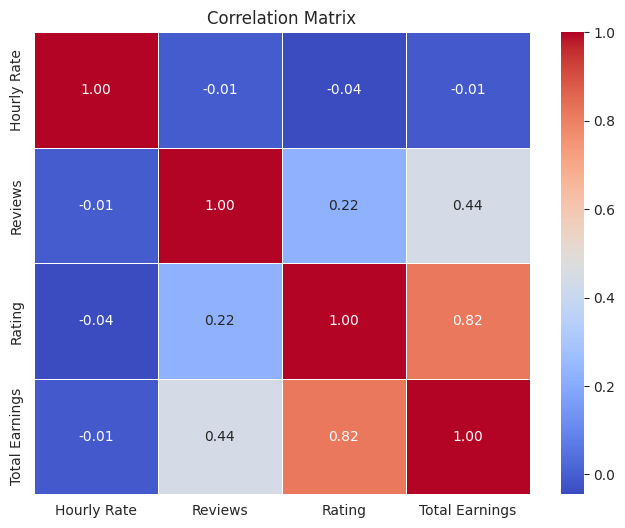

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset (replace 'your_dataset.csv' with actual file name)
df = pd.read_csv("cleaned_dataset.csv")

# Compute correlation matrix
correlation_matrix = df[['Hourly Rate', 'Reviews', 'Rating', 'Total Earnings']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


We can observe that:
1. Strong Positive Correlation: Rating & Total Earnings (0.82)
  * Freelancers with higher ratings tend to have higher total earnings. This suggests that client satisfaction and positive reviews play a significant role in increasing overall earnings.

2. Moderate Positive Correlation: Reviews & Total Earnings (0.44)
  * More reviews are linked to higher total earnings, but the relationship is not as strong as with ratings. This could indicate that having many reviews helps, but the quality of those reviews (ratings) is more influential.
3. Weak Positive Correlation: Reviews & Rating (0.22)
  * There is a slight positive relationship between the number of reviews and the rating, meaning that freelancers with more reviews might have slightly better ratings, but it’s not a strong factor.
4. Negligible Correlation: Hourly Rate & Other Factors (-0.01 to -0.04)
  * Hourly rate does not significantly correlate with total earnings, rating, or reviews. This suggests that charging a higher rate doesn’t necessarily result in higher earnings or better reviews—instead, factors like reputation and work consistency matter more.

**Key Takeaways**

  * High ratings are a strong indicator of success (higher earnings).
  * More reviews contribute to earnings, but quality matters more than quantity.
  * Hourly rate alone is not a strong predictor of total earnings—freelancers should focus on building a strong profile, getting high ratings, and maintaining steady work.

#### **3- Graphical univariate**
These plots analyze one variable at a time, showing distributions or frequencies.

**- Histogram Analysis**


To visualize the distribution of the numerical columns, we plot histograms with Kernel Density Estimation (KDE) enabled. These histograms help in identifying trends, skewness, and outliers.

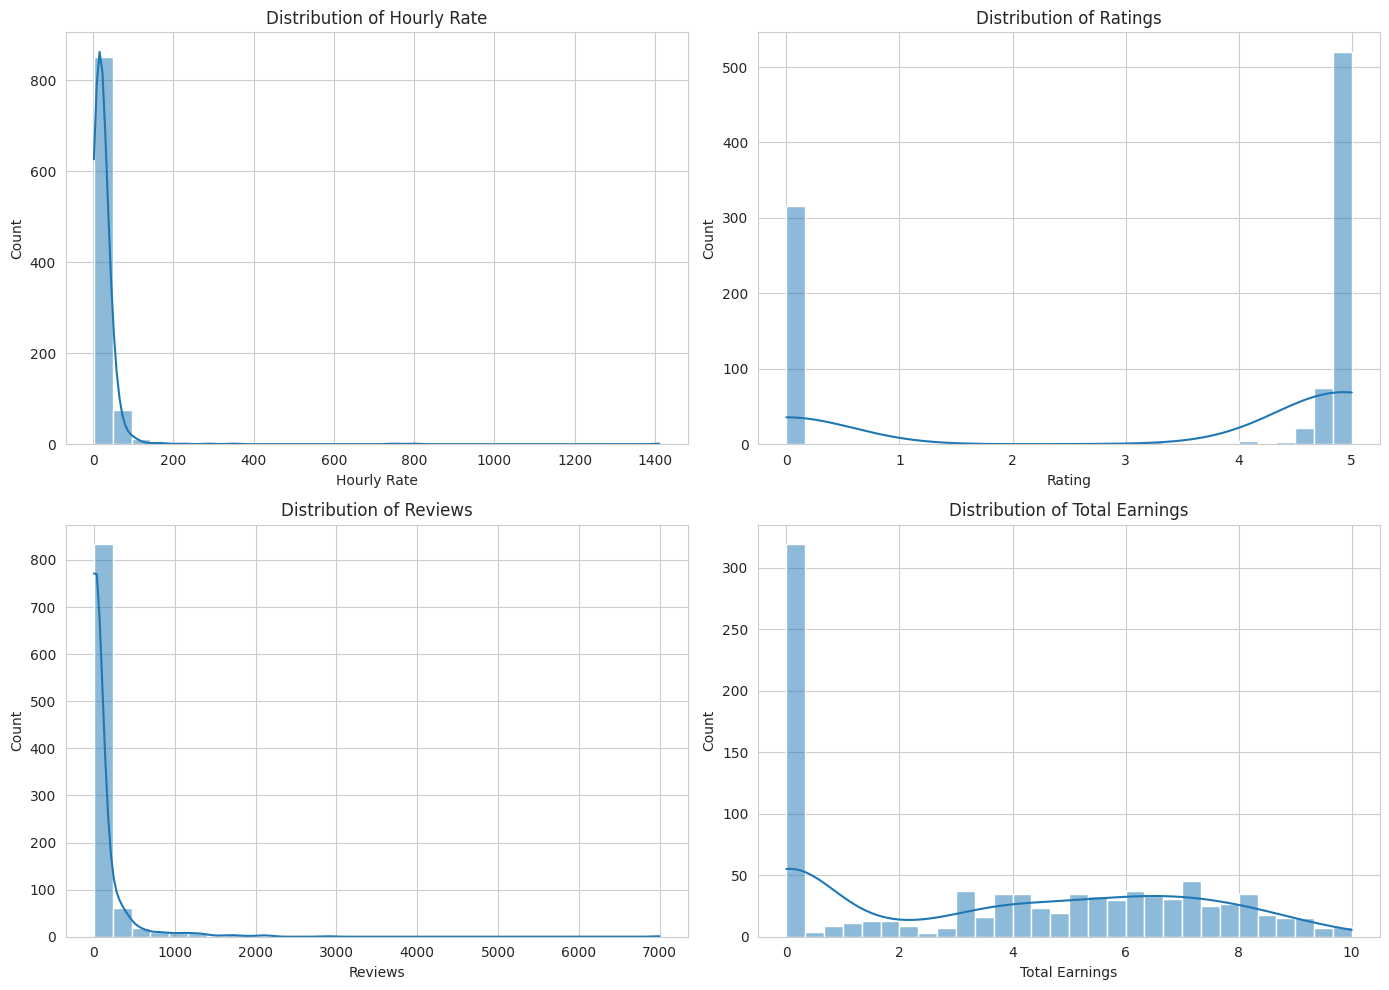

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Create histograms for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

columns = ['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']
titles = ['Distribution of Hourly Rate', 'Distribution of Ratings', 'Distribution of Reviews', 'Distribution of Total Earnings']

for i, ax in enumerate(axes.flatten()):
    sns.histplot(df[columns[i]], bins=30, kde=True, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel(columns[i])

plt.tight_layout()
plt.show()


We can observe that:

- Hourly Rate: The distribution is highly right-skewed, meaning that while most freelancers charge a reasonable rate, a few charge exceptionally high fees.

- Rating: There is a peak at 5.0, indicating that most freelancers maintain high ratings, while another peak at 0 suggests that some freelancers have not received any reviews.

- Reviews: The data is heavily skewed toward lower review counts, with a few freelancers receiving thousands of reviews.

- Total Earnings: Most freelancers earn relatively low amounts, while a few outliers have significantly higher earnings.

**- Boxplots for Outlier Detection**


Boxplots help visualize outliers and the overall spread of the data. Since extreme values were noticed in Hourly Rate and Total Earnings, boxplots will confirm the extent of these outliers.

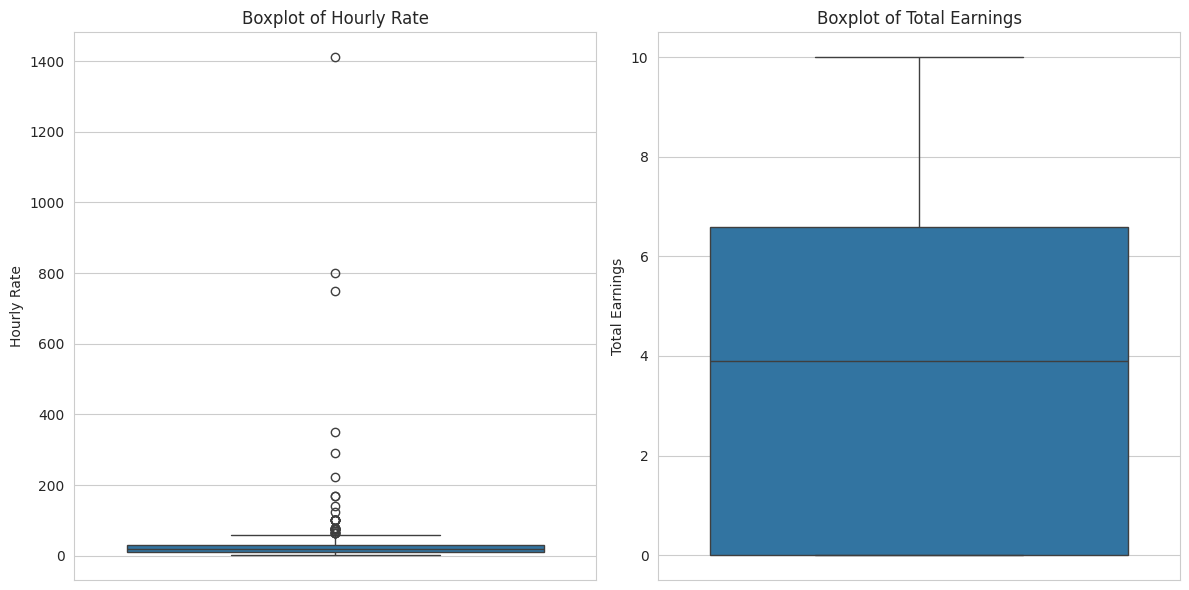

In [69]:
# Create boxplots for Hourly Rate and Total Earnings
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y=df["Hourly Rate"], ax=axes[0])
axes[0].set_title("Boxplot of Hourly Rate")

sns.boxplot(y=df["Total Earnings"], ax=axes[1])
axes[1].set_title("Boxplot of Total Earnings")

plt.tight_layout()
plt.show()


We can observe that:

Hourly Rate: There are many outliers above 100 dollars/hour, with some freelancers charging over 800 dollars/hour and even 1400 dollars/hour.
Total Earnings: The boxplot does not show extreme outliers due to the 10k dollars cap, but a small percentage of freelancers earn significantly more than the majority.
These insights suggest that income disparity is high in the freelance market, with a few top freelancers capturing most of the revenue.

**- Density Plots for Data Spread**

Density plots (KDE plots) provide a smooth representation of data distribution, highlighting concentration areas. Since Reviews and Total Earnings are heavily skewed, we apply a logarithmic transformation (log1p) to make the distributions more interpretable.

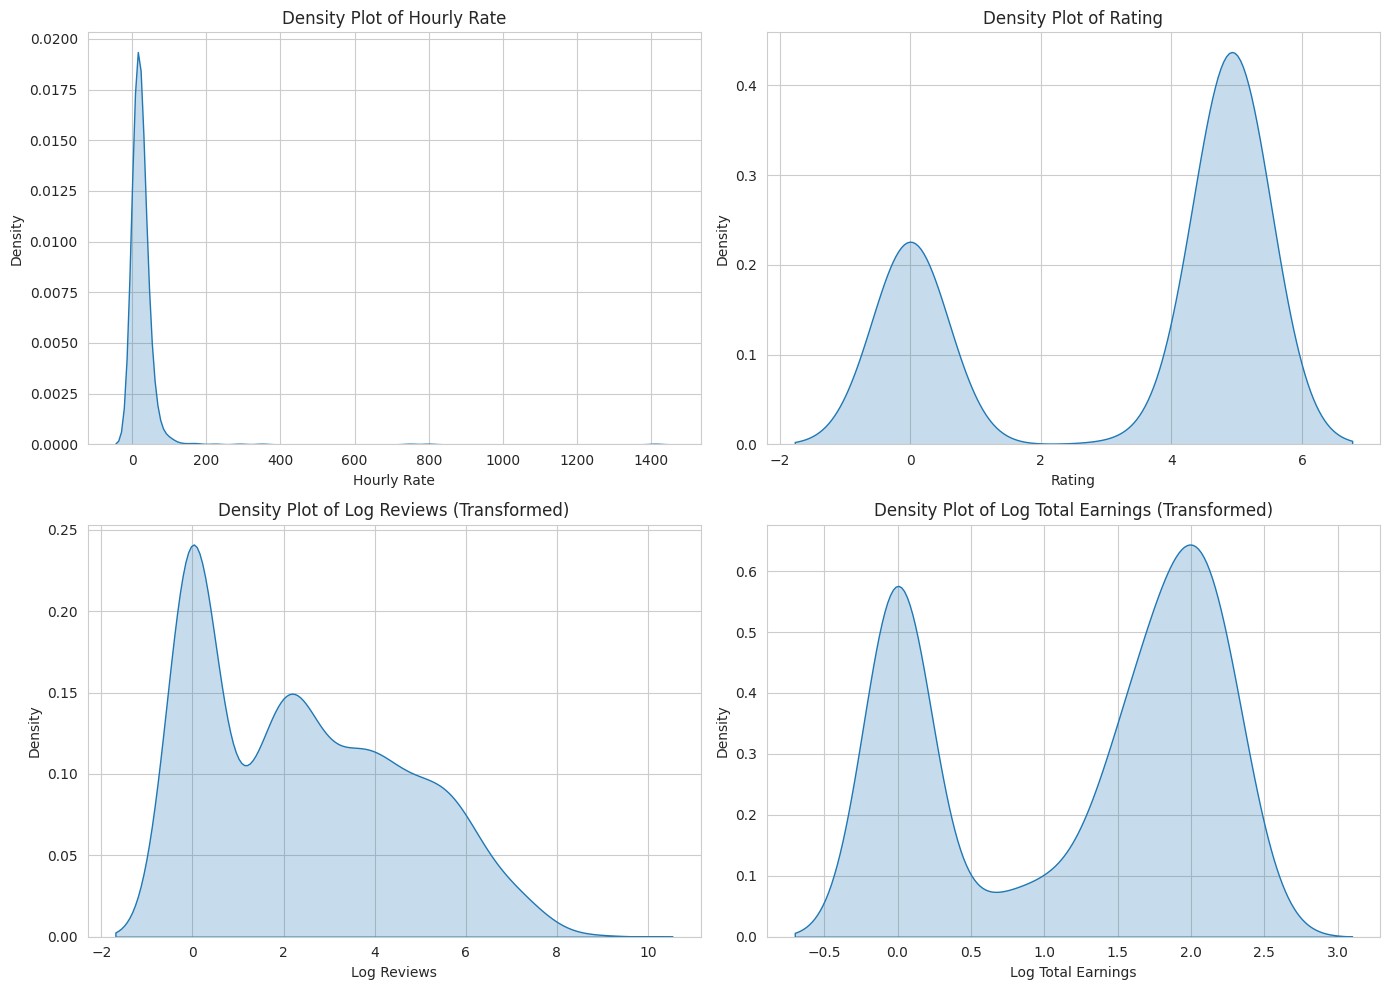

In [70]:
# Apply log transformation to highly skewed columns
df['Log Reviews'] = np.log1p(df['Reviews'])  # log1p handles zero values
df['Log Total Earnings'] = np.log1p(df['Total Earnings'])

# Create density plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.kdeplot(df['Hourly Rate'], fill=True, ax=axes[0, 0])
axes[0, 0].set_title("Density Plot of Hourly Rate")

sns.kdeplot(df['Rating'], fill=True, ax=axes[0, 1])
axes[0, 1].set_title("Density Plot of Rating")

sns.kdeplot(df['Log Reviews'], fill=True, ax=axes[1, 0])
axes[1, 0].set_title("Density Plot of Log Reviews (Transformed)")

sns.kdeplot(df['Log Total Earnings'], fill=True, ax=axes[1, 1])
axes[1, 1].set_title("Density Plot of Log Total Earnings (Transformed)")

plt.tight_layout()
plt.show()

We can observe that:

**Before transformation**, Reviews and Total Earnings had an extreme right skew, making it difficult to analyze their distribution properly.

**After applying log transformation**, the distributions appear more normal, allowing for easier interpretation.

**The log transformation is useful when dealing with highly skewed data**, as it compresses extreme values while preserving the overall structure.

##### **- Choropleth Map: Distribution of Freelancers by Country**


The choropleth map visually represents the number of freelancers in each country. Darker shades indicate a higher number of freelancers, while lighter shades represent fewer freelancers.

In [71]:
import plotly.express as px

# Count freelancers per country
country_counts = df["Location"].value_counts().reset_index()
country_counts.columns = ["Country", "Freelancer Count"]

# Create choropleth map
fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode="country names",
                    color="Freelancer Count",
                    title="Distribution of Freelancers by Country",
                    color_continuous_scale="Blues")

fig.show()

Result here:

##### **- Bar chart:**
 Bar chart is a graphical representation used to analyze the distribution of a single categorical variable. It displays distinct categories on the x-axis and their corresponding frequencies (counts or proportions) on the y-axis. This helps in identifying the most common and least common categories within the dataset.*italicized text*

###### (a) Top 10 most in-demand skills:


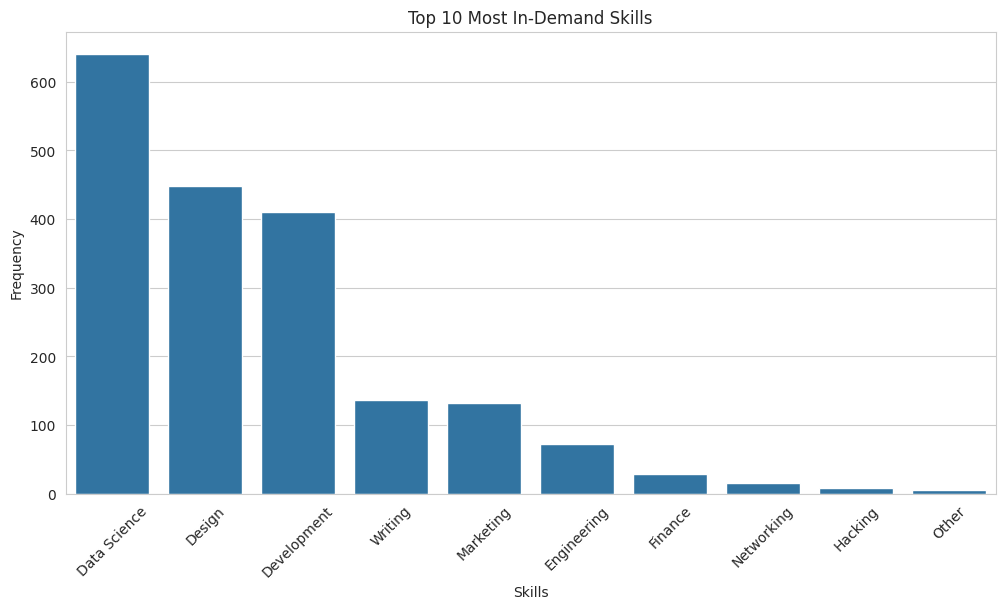

In [72]:
skill_counts = df["Skills"].str.split(", ").explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=skill_counts.index[:10], y=skill_counts.values[:10])
plt.xticks(rotation=45)
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.title("Top 10 Most In-Demand Skills")
plt.show()

##### **- Boxplot:**
Boxplot is a graphical representation of the distribution of a single numerical variable. It displays the median, quartiles, and potential outliers, helping to identify skewness, spread, and anomalies in the data. The box represents the interquartile range (IQR), while whiskers extend to 1.5 times the IQR. Points outside this range are considered outliers.


###### (a) Average earning for single/muli-skilled freelancers

Average Earnings for Single Skill Freelancers: $3.85
Average Earnings for Multiple Skills Freelancers: $3.65
Freelancers with a single skill earn more on average.


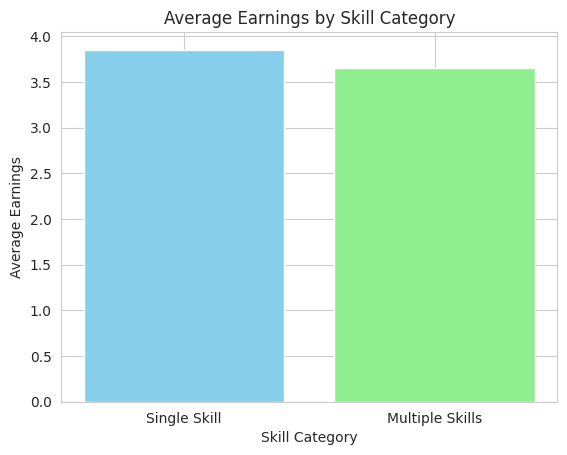

In [73]:
import pandas as pd

df = pd.read_csv("cleaned_dataset.csv")

# Initialize variables to store total earnings and counts
single_skill_total = 0
single_skill_count = 0
multiple_skills_total = 0
multiple_skills_count = 0

# Iterate through the dataset
for index, row in df.iterrows():
    skills = row['Skills'].split(',')  # Split skills by comma
    earnings = row['Total Earnings']

    if len(skills) == 1:  # Single skill
        single_skill_total += earnings
        single_skill_count += 1
    else:  # Multiple skills
        multiple_skills_total += earnings
        multiple_skills_count += 1

# Calculate average earnings
single_skill_avg = single_skill_total / single_skill_count if single_skill_count > 0 else 0
multiple_skills_avg = multiple_skills_total / multiple_skills_count if multiple_skills_count > 0 else 0

# Output results
print(f"Average Earnings for Single Skill Freelancers: ${single_skill_avg:.2f}")
print(f"Average Earnings for Multiple Skills Freelancers: ${multiple_skills_avg:.2f}")

# Compare earnings
if single_skill_avg > multiple_skills_avg:
    print("Freelancers with a single skill earn more on average.")
elif single_skill_avg < multiple_skills_avg:
    print("Freelancers with multiple skills earn more on average.")
else:
    print("Both groups earn the same on average.")


# Data for visualization
categories = ['Single Skill', 'Multiple Skills']
averages = [single_skill_avg, multiple_skills_avg]

# Plot the results
plt.bar(categories, averages, color=['skyblue', 'lightgreen'])
plt.title('Average Earnings by Skill Category')
plt.xlabel('Skill Category')
plt.ylabel('Average Earnings')
plt.show()

We can observe that:

Freelancers with a single skill earn slightly more(3.85) than those with multiple skills (3.85). This could be because specializing in one skill leads to higher expertise and demand, while multi-skilled freelancers might spread their focus too thin. Certain specialized skills may also pay more. More research is needed to fully understand the reasons behind this trend.



##### **- Word cloud:**
A word cloud is a visualization technique that displays the most frequent words in a dataset, where the size of each word corresponds to its frequency. It is especially useful for analyzing categorical or textual data by highlighting commonly occurring terms.

###### (a) Most common freelance skills

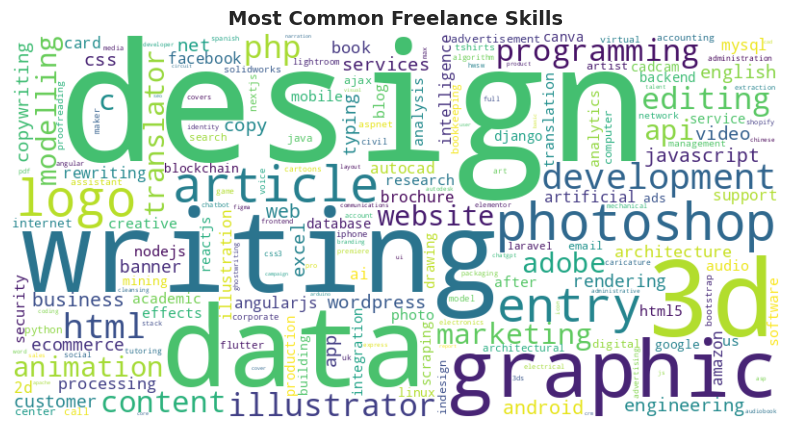

Skill Frequencies:
Counter({'design': 437, 'writing': 171, 'data': 166, '3d': 148, 'graphic': 120, 'photoshop': 97, 'logo': 89, 'article': 86, 'entry': 84, 'development': 82, 'html': 78, 'php': 67, 'illustrator': 66, 'programming': 60, 'editing': 60, 'content': 57, 'marketing': 55, 'c': 54, 'api': 50, 'website': 50, 'animation': 50, 'translator': 49, 'adobe': 49, 'modelling': 48, 'javascript': 46, 'android': 45, 'business': 45, 'web': 44, 'services': 40, 'excel': 40, 'video': 40, 'engineering': 39, 'app': 39, 'wordpress': 39, 'copywriting': 38, 'css': 38, 'english': 37, 'copy': 37, 'net': 36, 'banner': 34, 'ecommerce': 34, 'customer': 33, 'rendering': 33, 'typing': 33, 'book': 31, 'architecture': 31, 'processing': 31, 'rewriting': 28, 'ai': 28, 'autocad': 28, 'support': 27, 'intelligence': 26, 'artificial': 25, 'angularjs': 25, 'amazon': 25, 'illustration': 25, '2d': 25, 'card': 24, 'mysql': 23, 'brochure': 23, 'facebook': 23, 'research': 21, 'html5': 21, 'after': 20, 'effects': 20, 'a

In [74]:
# Install necessary libraries
!pip install wordcloud matplotlib pandas

# Import required libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter

# Create a DataFrame
df = pd.DataFrame(data)

# Normalize the text: convert to lowercase and remove punctuation
def normalize_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply normalization to the "Skills" column
df["Skills"] = df["Skills"].apply(normalize_text)

# Split skills into individual words and count their frequency
all_skills = " ".join(df["Skills"].dropna()).split()
skill_frequencies = Counter(all_skills)

# Convert to a dictionary for WordCloud
skill_frequencies_dict = dict(skill_frequencies)

# Generate word cloud with normalized text
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    max_words=200,
).generate_from_frequencies(skill_frequencies_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Freelance Skills", fontsize=14, fontweight="bold")
plt.show()

# Print the skill frequencies for verification
print("Skill Frequencies:")
print(skill_frequencies)

We can observe that:

The word cloud highlights that design is the most prominent freelance skill, as indicated by its largest size, followed by writing and programming. Within the design category, the most commonly used tools are Photoshop, 3D design, and Illustrator.

The word cloud and histogram show different most frequent skills because they handle data differently. The word cloud focuses on how often individual words appear, so "design" stands out since it appears frequently across various skill areas like "Graphic Design" and "Web Design." In contrast, the histogram groups skills into broader categories, which is why "Data Science" appears as the most common category it includes many related skills like "Data Analysis" and "Machine Learning." To align both visuals, you can group similar skills into categories before creating the word cloud.

**- Choropleth Map: Distribution of Freelancers by Country**

#### **4- Graphical multivariate**
These plots analyze relationships between two or more variables.

##### **- Boxplot: Hourly Rate per Country**


The boxplot displays the distribution of freelancers' hourly rates across different countries. It shows the median, quartiles, and potential outliers for each country's rates.

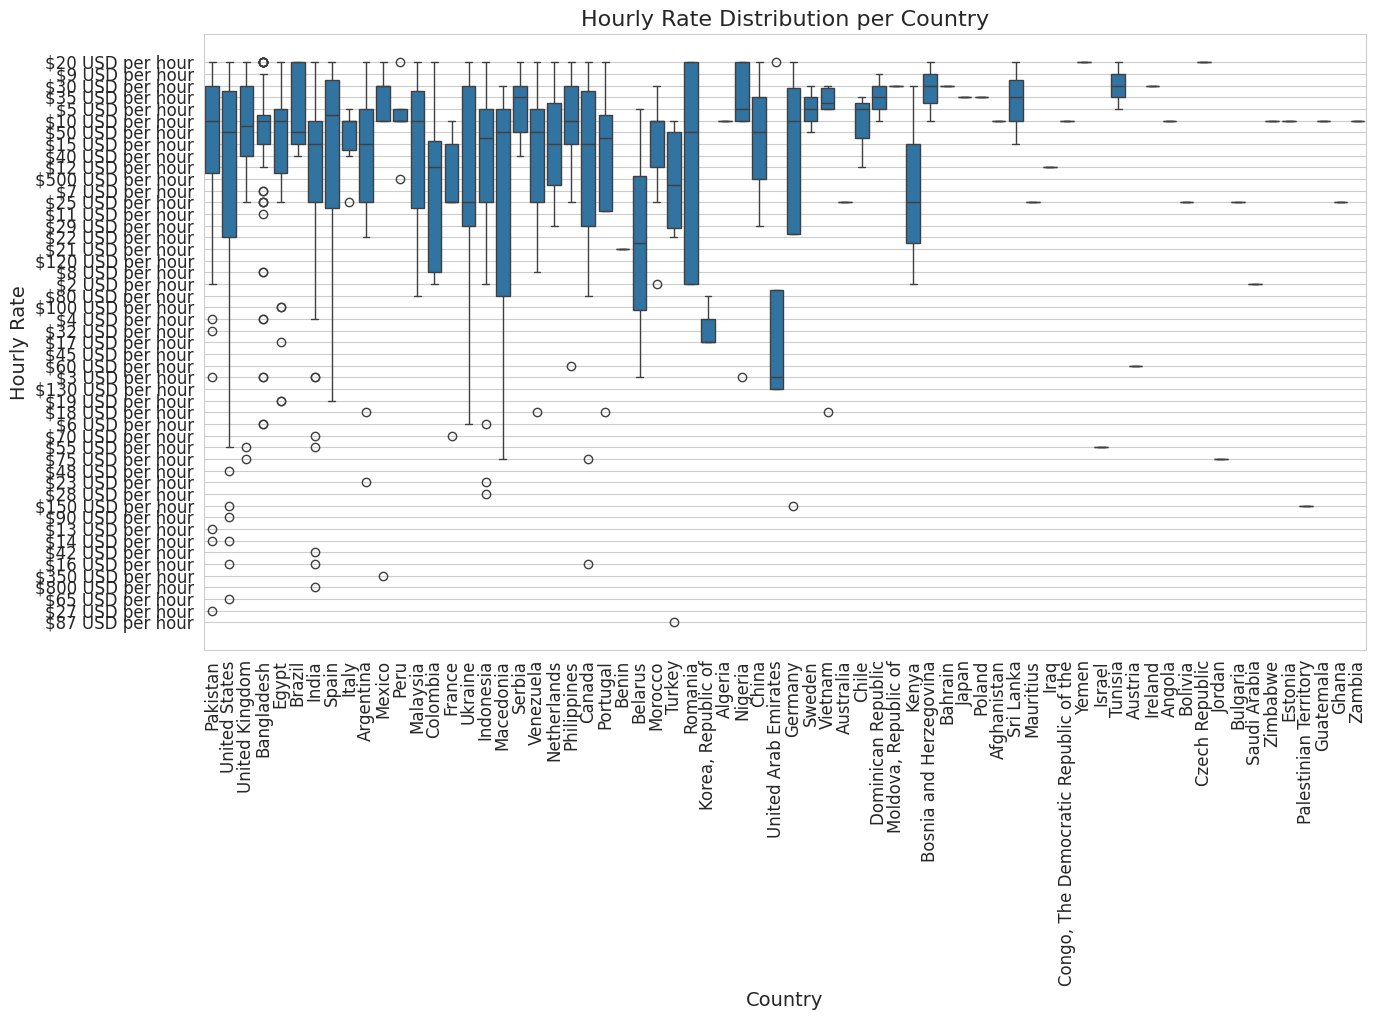

In [75]:

# Set figure size
plt.figure(figsize=(15, 8))  # Increase width and height

# Create boxplot
sns.boxplot(x="Location", y="Hourly Rate", data=df)

# Improve text visibility
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Increase font size of y-axis labels
plt.xlabel("Country", fontsize=14)
plt.ylabel("Hourly Rate", fontsize=14)
plt.title("Hourly Rate Distribution per Country", fontsize=16)

plt.show()

result here:

##### **- Boxplot: Total Earnings per Country**


This boxplot visualizes the distribution of total earnings for freelancers in different countries. It provides insights into which countries have higher-earning freelancers and identifies outliers.

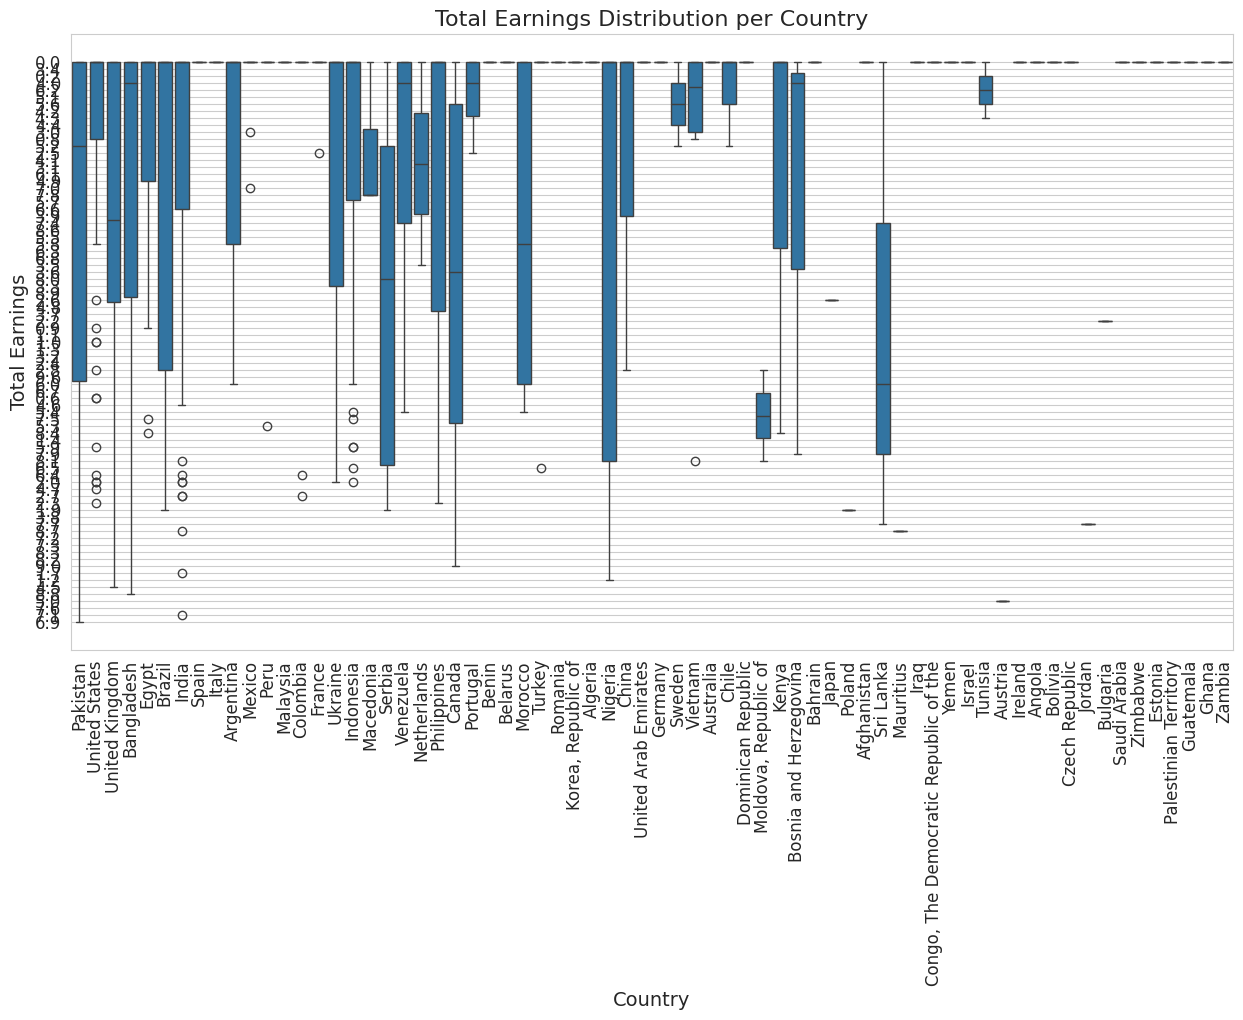

In [76]:
# the figure size
plt.figure(figsize=(15, 8))  # Increase width and height

# Create boxplot
sns.boxplot(x="Location", y="Total Earnings", data=df)

# Improve text visibility
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Increase font size of y-axis labels
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total Earnings", fontsize=14)
plt.title("Total Earnings Distribution per Country", fontsize=16)

plt.show()

result here:

##### **- Scatter Plots For Trends:**
Scatter plots are used to visually explore trends and relationships between different variables. By plotting Rating vs. Total Earnings, Reviews vs. Hourly Rate, and Skills Count vs. Total Earnings, we can observe potential patterns, outliers, or dependencies that might not be immediately evident from raw data. These visualizations help in identifying meaningful insights for further analysis.

###### (a) Rating vs. Total Earnings

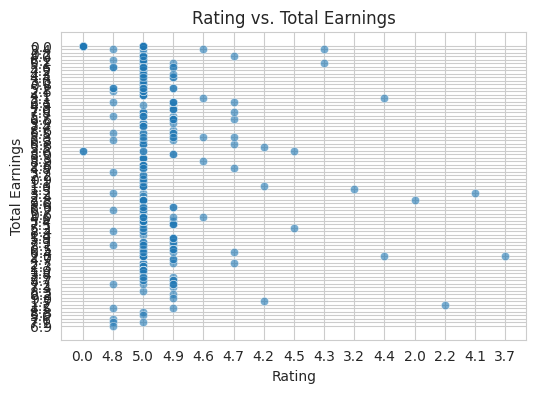

In [77]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Rating", y="Total Earnings", alpha=0.6)
plt.title("Rating vs. Total Earnings")
plt.xlabel("Rating")
plt.ylabel("Total Earnings")
plt.show()

We can observe that:
  * The majority of the ratings are clustered around 5, with a few instances of lower ratings.
  * Higher total earnings seem to be associated with ratings close to 5, while lower ratings correspond to lower earnings.
  * There are a few outliers at very low ratings, but they do not seem to have high total earnings.

###### (b) Reviews vs. Hourly Rate


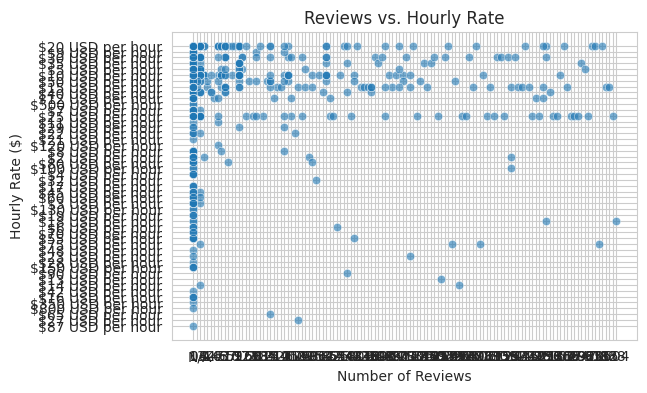

In [78]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Reviews", y="Hourly Rate", alpha=0.6)
plt.title("Reviews vs. Hourly Rate")
plt.xlabel("Number of Reviews")
plt.ylabel("Hourly Rate ($)")
plt.show()

We can observe that:
  * Most of the data points are concentrated at lower hourly rates.
  * There are a few extreme outliers where the hourly rate is significantly high.
  * A higher number of reviews does not necessarily correlate with higher hourly rates.

###### (c) Skills Count vs. Total Earnings

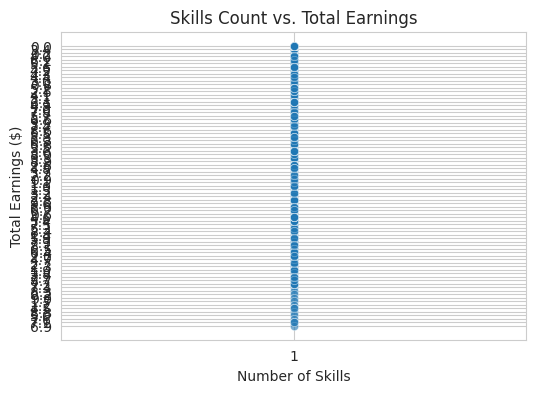

In [79]:
# Create a new column for the number of skills
df['Skills Count'] = df['Skills'].apply(lambda x: len(str(x).split(',')))

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x=df['Skills Count'].astype(str), y="Total Earnings", alpha=0.6)
plt.title("Skills Count vs. Total Earnings")
plt.xlabel("Number of Skills")
plt.ylabel("Total Earnings ($)")
plt.show()

We can observe that:
  * For each specific skill count, total earnings vary widely. This indicates that the number of skills alone does not solely determine earnings—other factors like skill relevance, experience, or market demand may also play a role.
  * Higher skill counts show a slight trend toward increased earnings, but not strictly linear.  
  * High earners exist across all skill levels, suggesting skill value matters more than quantity.